**Respuestas teóricas relacionada a las métricas de los modelos trabajados**

En el curso del TP debemos poder responder (adicionalmente):

**1.-** ¿Que receta parece otorgar el mejor ratio de costo/beneficio? Respecto a este punto considere que muchas veces el mayor "accuracy" (por solo nombrar una metrica) no significa el mayor beneficio. Esto se puede entender si consideramos que un modelo no se reduce solo a su inferencia, sino a todos lo pasos que nos permiten llevarla adelante.

**2.-** Respecto a los modelos, para los `Trees` es necesario normalizar los datos? y para `XGB`?

**3.-** Intuitivamente uno pensaria que los clasificadores deberian andar mejor en los espacios mas grandes (o de mayor area). Tiene alguna forma de corroborar o refutar esta idea?

**4.-** Si el modelo fuera utilizado para identificar anómalias en espacios verdes,sobre que preferiria tener mayor efectividad? (el conocido dilema ¿Precision o Recall?) Es decir que proporcion de los espacios verdes identificados como sanos estaban sanos? (Precision) o que proporcion de los espacios verdes actualmente sanos, fueron identificados como tales? (Recall)
Como ayuda piense las implicancias (mas allá del espacio verde en si) de marcar siempre en falta algun sitio (logistica, transporte, etc).

**1.- ¿Que receta parece otorgar el mejor ratio de costo/beneficio? Respecto a este punto considere que muchas veces el mayor "accuracy" (por solo nombrar una metrica) no significa el mayor beneficio. Esto se puede entender si consideramos que un modelo no se reduce solo a su inferencia, sino a todos lo pasos que nos permiten llevarla adelante.**


**Análisis de las métricas para identificación de espacios verdes**

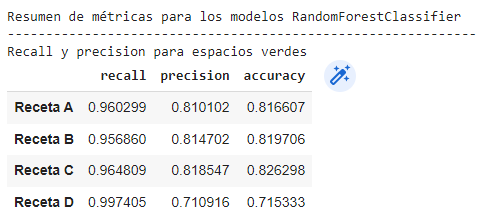

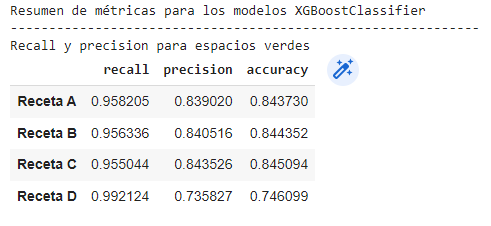

Tanto en el modelo RandomForestClassifier como en XGBoostClassifier, las recetas A, B y C presentan valores de métricas muy similares. Se evidencia en todos los casos que el recall es superior al 95%, mientras que la precision y el accuracy superan el 80%. Sin embargo, las métricas de ambos modelos correspondientes a la receta D son considerablemente diferentes. 

En el caso de la receta D, el recall es de aproximadamente 99% en ambos modelos. Esto implica que casi la totalidad de los espacios verdes fueron identificados correctamente como tales. No obstante, la precision y el accuracy se encuentran proximas al 75%, valor ligeramente inferior al alcanzado por las recetas A, B y C. 

Respecto a la relación costo/beneficio, la receta A es la más simple y la que conlleva menor costo computacional. Consiste únicamente en eliminación de valores nulos y limpieza de outliers. En contraste, la receta D es la más compleja ya que implica imputacion estacional, filtrado de datos por nubosidad y normalizacion. A pesar de la gran diferencia en el tratamiento de los datos, las métricas de estas recetas solo difieren en un 5%. Por esta razón, se considera que la receta A es la que presenta mayor costo/beneficio ya que con un tratamiento básico de los datos permite obtener buenos valores de métricas.

**Análisis de las métricas para identificación de espacios no verdes**

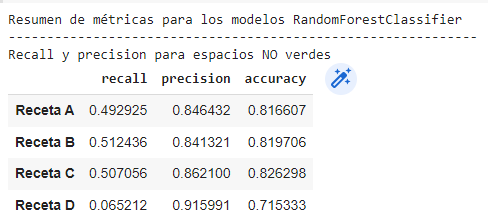

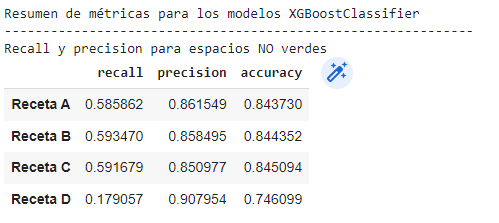

En el caso de los espacios no verdes, las tendencias generales coinciden con el caso de espacios verdes. En otras palabras, las recetas A, B y C presentan valores muy similares de recall, precision y accuracy para ambos modelos. Es así que para estas recetas, el recall es cercano al 60%, mientras que la precision y el accuracy son de aproximadamente el 85%.

Nuevamente, la receta D es la que presenta el comportamiento más dispar. Los valores de sus métricas difieren según el modelo aplicado. Para el RandomForestClassifier, el recall es de solo 6%, la precision de 91% y el accuracy de 71%. Por su parte, para el XGBoostClassifier, las métricas toman valores de 18%, 91% y 74% respectivamente.  

En ambos casos el recall es muy bajo, lo que indica que el modelo no identifica correctamente a los espacios no verdes, sino que los confunde con espacios verdes. Esto permite suponer que el valor de las bandas pertenecientes a los espacios no verdes son similares a los de los espacios verdes. A su vez, existe una diferencia entre entre la construcción del dataset de espacios verdes y espacios no verdes. Para este último, hay correlación entre el área y el target. Es decir, el dataset de espacios no verdes se construyó con un buffer específico, lo que implica que esté vinculado con la variable área. Si esta variable no es tenida en cuenta en el análisis, se pierde mucha información, la cual es esencial a la hora de identificar a los espacios no verdes. 


**2.- Respecto a los modelos, para los Trees es necesario normalizar los datos? y para XGB?**

Para los Trees no necesariamente hay que normalizar, esto va a depender a qué metrica le vamos a dar mayor importancia y que umbral es el que necesitamos alcanzar. Dado que el Recall con los datos normalizados tuvo una mejora importante para espacios verdes.

En el caso de XGB, al utilizar el método de descenso por gradiente para optimizar la función de pérdida, se aconseja la normalización de los datos para obtener resultados más confiables.  

**3.- Intuitivamente uno pensaria que los clasificadores deberian andar mejor en los espacios mas grandes (o de mayor area). Tiene alguna forma de corroborar o refutar esta idea?**

En el TP1 vimos que un espacio verde mayor al tener más cantidad de datos, la variación temporal es más estable en su comportamiento estacional. Cuando el espacio verde es muy pequeño se ve más fácilmente influenciado por la presencia de outliers. También hay que tener en cuenta que la resolución máxima para algunas bandas era de 10m.  

Por otro lado, si quisieramos corroborar si un clasificador funciona bien en espacios de áreas pequeñas, podemos utilizar el enfoque pixel a pixel en un raster nuevo en lugar de usar el análisis de imágenes basada en objetos (OBIA).

**4.- Si el modelo fuera utilizado para identificar anómalias en espacios verdes,sobre que preferiria tener mayor efectividad? (el conocido dilema ¿Precision o Recall?) Es decir que proporcion de los espacios verdes identificados como sanos estaban sanos? (Precision) o que proporcion de los espacios verdes actualmente sanos, fueron identificados como tales? (Recall) Como ayuda piense las implicancias (mas allá del espacio verde en si) de marcar siempre en falta algun sitio (logistica, transporte, etc).**

Dado que una mayor efectividad implica la capacidad de conseguir identificar las anomalías en los espacios verdes, entonces la métrica que nos sería más relevante es el Recall ya que, este nos sirve para saber si no se está perdiendo positivos (espacios verdes) o, dicho de otra forma, qué tantos espacios verdes fueron identificados con respecto a la totalidad de ellos. Bajo este enfoque, la anomalía en un espacio verde (o un espacio verde no sano) se desprende de la clasificación misma, luego de implementar el modelo con nuevos datos y no es algo que conocemos a priori. También se podría considerar, en caso de ser posible, una nueva variable target que nos permita clasificar en espacios verdes sanos y no sanos para lo cual necesitamos agregar otro tipo de variables construidas, por ejemplo, a partir de los índices, cambiando así el conjunto de datos con el que venimos trabajando. Sin embargo, la métrica de interés seguiría siendo el Recall.

En términos de logística, nos interesa que al alimentar a nuestro modelo (cuyo Recall se considera en un umbral aceptable) con datos nuevos obtenidos de una nueva imagen satelital correspondiente a un espacio verde, si este espacio es ahora clasificado como no verde entonces se puede disparar una alarma para la cual será justificada la utilización de recursos humanos, de transporte o administrativos para inspeccionar el por qué de esta anomalía: poda excesiva de árboles, nuevas construcciones, asentamientos irregulares, etc.





